In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
FILE_PATH = 'D:\Python\\names\\'

In [5]:
# 1. Построить график изменения количества имен Ruth и Robert с 1900 по 2000.

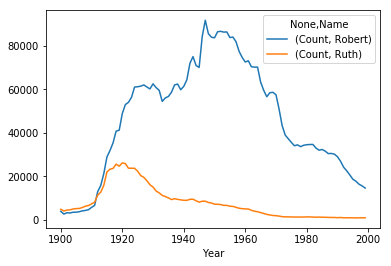

In [39]:
names_by_year = {}
for year in range(1900, 2000, 1):
    names_by_year[year] = pd.read_csv('{}/yob{}.txt'.format(FILE_PATH, year),
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot()

In [ ]:
# 2. Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).

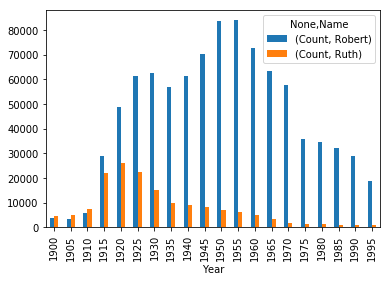

In [40]:
names_by_year = {}
for year in range(1900, 2000, 5):
    names_by_year[year] = pd.read_csv('{}/yob{}.txt'.format(FILE_PATH, year),
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot.bar()

In [ ]:
# 3.Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.

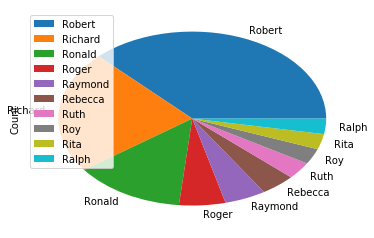

In [41]:
names = pd.read_csv('{}/yob{}.txt'.format(FILE_PATH, 1950), names=['Name','Gender','Count'])
names = names[(names.Name.str.startswith('R'))]
names_for_pie = names.groupby('Name').sum().sort_values(by='Count', ascending=False).head(10)
names_for_pie.plot.pie(y='Count')

In [30]:
# 4. Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. 
# Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв 
# в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".

In [67]:
names_by_year = {}
for year in range(1900, 2000, 1):
    names_by_year[year] = pd.read_csv('{}/yob{}.txt'.format(FILE_PATH, year),
        names=['Name','Gender','Count']
    )
names = pd.concat(names_by_year)
names.head(10)

Name Gender  Count
1900 0       Mary      F  16706
     1      Helen      F   6343
     2       Anna      F   6114
     3   Margaret      F   5304
     4       Ruth      F   4765
     5  Elizabeth      F   4096
     6   Florence      F   3920
     7      Ethel      F   3896
     8      Marie      F   3856
     9    Lillian      F   3414

""


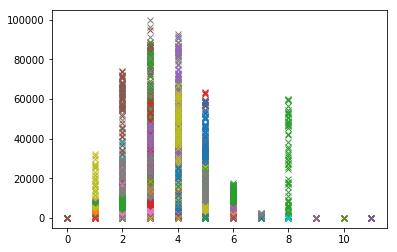

In [68]:
def scatter_len(group):
    plt.plot(group['Len'], group['Count'], 'x', label=group.name)
    
def Number_of_consonants(str):
    k = 0
    for c in str:
        if not c in ['A', 'a', 'E', 'e', 'I', 'i', 'O', 'o', 'U', 'u', 'Y', 'y']:
            k += 1
    return k

names['Len'] = names.apply(lambda row: Number_of_consonants(row.Name), axis=1)
names.groupby('Name').apply(scatter_len)